In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import lec6_graphs as gfx

import statsmodels.api as sm
            import statsmodels.formula.api as smf

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('wells.csv').drop('index', axis=1)

In [2]:
df.shape

(3020, 5)

In [3]:
df.head()

,y,dist100,arsenic,educ4,assoc
0,1,0.16826,2.36,0.0,0
1,1,0.47322,0.71,0.0,0
2,0,0.20967,2.07,2.5,0
3,1,0.21486,1.15,3.0,0
4,1,0.40874,1.10,3.5,1


In [4]:
df.columns

Index(['y', 'dist100', 'arsenic', 'educ4', 'assoc'], dtype='object')

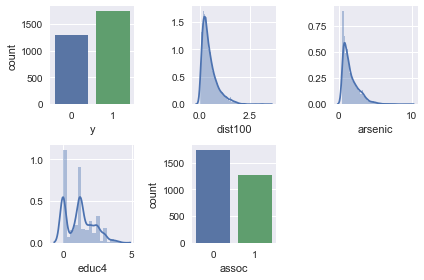

In [5]:
for index,value in enumerate(df):
    plt.subplot(2,3, index +1)
    if len(df[value].value_counts()) > 2:
        sns.distplot(df[value])
    else:
        sns.countplot(df[value])
    plt.tight_layout()

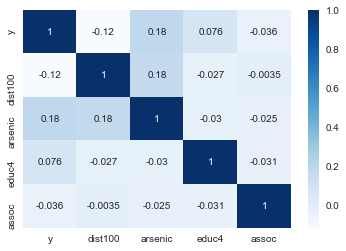

In [6]:
    sns.heatmap(df.corr(), cmap = 'Blues', annot=True)

In [7]:
m1_ols = smf.ols('y~dist100', df).fit()

In [8]:
def concise_summary(mod,print_fit=True):
    fit = pd.DataFrame({'Statistics': mod.summary2().tables[0][0][2:],
                       'Value': mod.summary2().tables[0][3][2:]})
    estimates = pd.DataFrame(mod.summary2().tables[1].loc[:,'Coef.':'Std.Err.'])
    if print_fit is True:
        print("\nGoodnes of Fit statistics\n", fit)
    print("\nPoint Estimates\n\n", estimates)

In [9]:
concise_summary(m1_ols)


Goodnes of Fit statistics
           Statistics      Value
2              Date:  4288.4686
3  No. Observations:    -2136.2
4          Df Model:      42.57
5      Df Residuals:   7.95e-11
6         R-squared:    0.24111

Point Estimates

               Coef.  Std.Err.
Intercept  0.648407  0.014347
dist100   -0.151539  0.023225


In [10]:
0.648407/0.014347

45.19460514393253

In [11]:
-0.151539 / 0.023225

-6.5248223896663085

(0.0, 0.8)

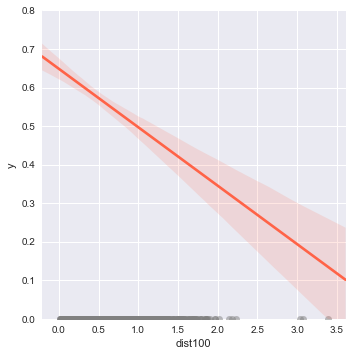

In [12]:
sns.lmplot('dist100','y',df,line_kws={'color':'tomato'}, scatter_kws={'color':'grey','alpha': .5})
plt.ylim(0.0,0.8)

In [13]:
m1_logit = smf.logit('y ~dist100',df).fit()

Optimization terminated successfully.
         Current function value: 0.674874
         Iterations 4


In [14]:
concise_summary(m1_logit)


Goodnes of Fit statistics
           Statistics       Value
2              Date:   4092.2639
3  No. Observations:     -2038.1
4          Df Model:     -2059.0
5      Df Residuals:  9.7978e-11
6         Converged:      1.0000
7    No. Iterations:            

Point Estimates

               Coef.  Std.Err.
Intercept  0.605959  0.060310
dist100   -0.621882  0.097426


In [15]:
dist100_mean = df['dist100'].mean()
estimate_y = m1_logit.params['Intercept'] + (m1_logit.params['dist100'] * dist100_mean)
print(estimate_y)

0.3053922392515757


In [16]:
def invlogit(x):
    return 1/(1+ np.exp(-x))
print (invlogit(estimate_y))

0.5757601624040816


In [17]:
dist100_mean

0.48331862570424283

In [18]:
pr_dist_100 = invlogit(m1_logit.params['Intercept'] + (m1_logit.params['dist100'] * 1))
pr_dist_200 = invlogit(m1_logit.params['Intercept'] + (m1_logit.params['dist100'] * 2))
pr_dist_300 = invlogit(m1_logit.params['Intercept'] + (m1_logit.params['dist100'] * 3))
pr_dist_400 = invlogit(m1_logit.params['Intercept'] + (m1_logit.params['dist100'] * 4))

In [19]:
pr_dist_100

0.4960194411878717

In [20]:
pr_dist_200

0.3457430029920142

In [21]:
pr_dist_300

0.22102787555555542

In [22]:
pr_dist_400

0.13220883169891437

In [23]:
decision_boundary = -m1_logit.params['Intercept'] / m1_logit.params['dist100']
decision_boundary

0.97439615007053

(0.0, 0.8)

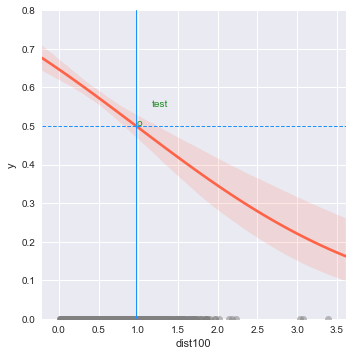

In [24]:
sns.lmplot('dist100','y',df,logistic=True,line_kws={'color':'tomato'}, scatter_kws={'color':'grey','alpha': .5})
plt.axvline(decision_boundary,lw=1,color='dodgerblue')
plt.axhline(.5,linestyle='--',color='dodgerblue', lw=1)
plt.text(decision_boundary +.2 , .5 + .05 ,'test', color='forestgreen')
plt.text(decision_boundary,.5,'o', color='forestgreen')
plt.ylim(0.0,0.8)

In [25]:
print('\nOLS-LPM')
concise_summary(m1_ols,print_fit=False)
print('\nLogit')
concise_summary(m1_logit,print_fit=False)


OLS-LPM

Point Estimates

               Coef.  Std.Err.
Intercept  0.648407  0.014347
dist100   -0.151539  0.023225

Logit

Point Estimates

               Coef.  Std.Err.
Intercept  0.605959  0.060310
dist100   -0.621882  0.097426


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train , X_test , y_train , y_test = train_test_split(df.loc[:,'dist100':'assoc'],
                                                       df['y'],
                                                       test_size=.33,random_state=11238)

In [27]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
default_model = LogisticRegression().fit(X_train_std,y_train)

In [29]:
default_model.coef_

array([[-0.33263063,  0.59061437,  0.14254114, -0.05194878]])

In [30]:
default_model.intercept_

array([0.34129115])

In [48]:
yhat = default_model.predict(X_test_std)
yhat[:20]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [49]:
from sklearn.metrics import confusion_matrix

m1_confusion = confusion_matrix(y_test,yhat)
m1_confusion

array([[171, 251],
       [117, 458]])

In [50]:
from sklearn.metrics import accuracy_score
m1_acc = accuracy_score(y_test,yhat)

In [51]:
m1_acc

0.6308926780341023

In [53]:
m1_acc - .5

0.13089267803410232

In [54]:
# 64% precision, que un clasificador aleatorio.
from sklearn.metrics import precision_score
m1_prec = precision_score(y_test, yhat)
m1_prec

0.6459802538787024

In [55]:
# 79% precision de positivos reales
from sklearn.metrics import recall_score
m1_recall = recall_score(y_test,yhat)
m1_recall

0.7965217391304348

In [56]:
#f1 media entre precision y recall
from sklearn.metrics import f1_score
m1_fscore = f1_score(y_test,yhat)
m1_fscore

0.7133956386292836

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.59      0.41      0.48       422
           1       0.65      0.80      0.71       575

   micro avg       0.63      0.63      0.63       997
   macro avg       0.62      0.60      0.60       997
weighted avg       0.62      0.63      0.62       997



In [58]:
from sklearn.metrics import roc_curve
yhat_pr = default_model.predict_proba(X_test)[:,1]

false_positive, true_positive, threshold = roc_curve(y_test,yhat_pr)

Text(0.5, 0, 'Falsos Positivos')

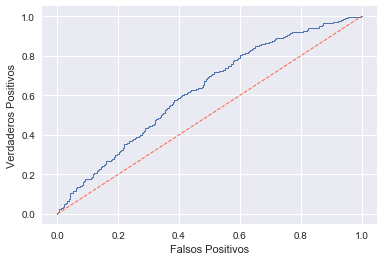

In [61]:
plt.plot(false_positive,true_positive,lw=1)
plt.plot([0,1], linestyle='--', lw=1, color = 'tomato')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
#curva roc

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,yhat_pr)
#area de curva es del 63%, si se mide contra el 50% de los casos, esta curva tiene un rendimiento superior del 12%

0.6267010096847311

In [65]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
m1_cv = cross_val_score(LogisticRegression(), X=df.loc[:,'dist100':'assoc'],
               y=df['y'],
               cv=3,
               scoring='f1')

In [66]:
m1_cv

array([0.70499244, 0.68932806, 0.69954476])

In [67]:
np.mean(m1_cv)

0.6979550879132436

In [68]:
np.std(m1_cv)

0.006492993434034528

In [73]:
#leave one out
from sklearn.model_selection import LeaveOneOut
m1_cv_loo = cross_val_score(LogisticRegression(), X=df.loc[:,'dist100':'assoc'],
               y=df['y'],
               cv=LeaveOneOut(),
               scoring='accuracy')

In [74]:
m1_cv_loo

array([1., 0., 0., ..., 0., 0., 1.])

In [76]:
np.mean(m1_cv_loo)

0.6139072847682119

In [77]:
np.std(m1_cv_loo)

0.4868522676097273

In [79]:
#Experimento 1, evaluar complejidad del modelo condicional a terminos polinomiales

In [80]:
#Generar las amtrices estandarizadas

In [84]:
std_matrix = StandardScaler().fit_transform(df.loc[:,'dist100':'assoc'])

from sklearn.preprocessing import PolynomialFeatures

df_int_2 = PolynomialFeatures(
                degree = 2,
                interaction_only=True,
                include_bias=False
).fit_transform(std_matrix)

df_int_3 = PolynomialFeatures(
                degree = 3,
                interaction_only=True,
                include_bias=False
).fit_transform(std_matrix)


/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [87]:
df.shape

(3020, 5)

In [85]:
df_int_2.shape

(3020, 10)

In [86]:
df_int_3.shape

(3020, 14)

In [88]:
#Definir las metricas

In [91]:
eval_metrics = ['f1','precision','recall','accuracy']

In [90]:
#iniciar loop

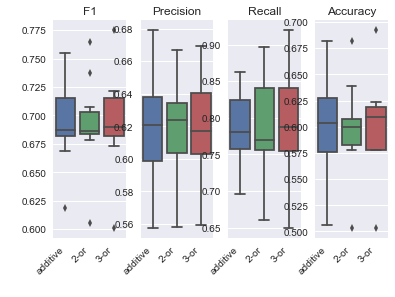

In [101]:
for index,value in enumerate(eval_metrics):
    tmp_1 = cross_val_score(LogisticRegression(),
                           df.loc[:,'dist100':'assoc'],
                            df['y'], cv =10 , scoring=value)
    tmp_2 = cross_val_score(LogisticRegression(),
                            df_int_2,
                            df['y'], cv =10 , scoring=value)
    tmp_3 = cross_val_score(LogisticRegression(),
                            df_int_3,
                            df['y'], cv =10 , scoring=value)
    tmp = pd.DataFrame(
        {'additive': tmp_1,
        '2-or' : tmp_2,
        '3-or': tmp_3}
    ).unstack().reset_index()
    tmp.rename(columns={'level_0':'order','level_1':'num', '0':'score'},inplace=True)
    plt.subplot(1,4, index +1)
    sns.boxplot(tmp.iloc[:,0],tmp.iloc[:,2])
    plt.title(value.capitalize())
    plt.ylabel(' ')
    plt.xlabel(' ')
    plt.xticks(rotation=45,ha='right')

,level_0,level_1,0
0,additive,0,0.600660
1,additive,1,0.610561
2,additive,2,0.590759
3,additive,3,0.605960
4,additive,4,0.506623
5,additive,5,0.632450
6,additive,6,0.682119
7,additive,7,0.634551
8,additive,8,0.571429
9,additive,9,0.561462
